In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
df1 = pd.read_csv("results/all_t01/0.csv")
df2 = pd.read_csv("results/all_t01/4.csv")
df3 = pd.read_csv("results/all_t01/7.csv")

In [157]:
def getdt(df):
    df['r'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
    df['v'] = np.sqrt(df['vx']**2 + df['vy']**2 + df['vz']**2)
    df['r2'] = df['x']**2 + df['y']**2 + df['z']**2
    df['v2'] = df['vx']**2 + df['vy']**2 + df['vz']**2
    
    dt= df.groupby('t', as_index=False)[['v2', 'u']].sum()
    dt['T'] = dt['v2'] / (3 * 64)
    return dt

dt1 = getdt(df1)
dt2 = getdt(df2)
dt3 = getdt(df3)

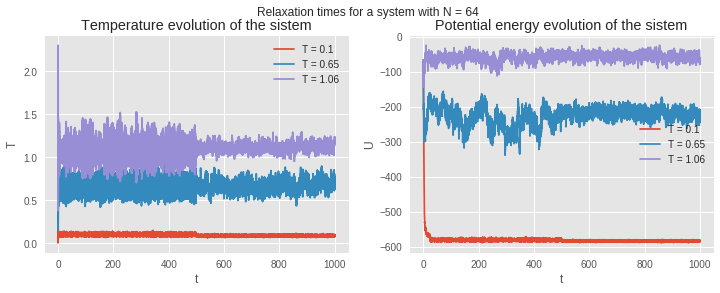

In [211]:
fig = plt.figure(1, figsize=[12, 4])
s1 = plt.subplot(121)
s1.plot(dt1['t'], dt1['T'], label = "T = 0.1")
s1.plot(dt2['t'], dt2['T'], label = "T = 0.65")
s1.plot(dt3['t'], dt3['T'], label = "T = 1.06")
s1.set_xlabel('t')
s1.set_ylabel('T')
s1.set_title("Temperature evolution of the sistem")
s1.legend()

s2 = plt.subplot(122)
s2.plot(dt1['t'], dt1['u'], label = "T = 0.1")
s2.plot(dt2['t'], dt2['u'], label = "T = 0.65")
s2.plot(dt3['t'], dt3['u'], label = "T = 1.06")
s2.set_xlabel('t')
s2.set_ylabel('U')
s2.set_title("Potential energy evolution of the sistem")
s2.legend()


fig.suptitle("Relaxation times for a system with N = 64")

plt.savefig("RelaxationTimes.png")

In [159]:
df_bytimestep['T'].iloc[100000:].mean()

0.7987413367949712

In [160]:
df['vx'].iloc[100000:].hist(bins=1000, normed = True, histtype='step')
plt.xlim(-5,5)

KeyError: 'vx'

In [161]:
li = []
path = ''
for i in range(0,160):
    filename = path + str(i)+'.csv'
    try:
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)
    except FileNotFoundError:
        pass

d = pd.concat(li, axis=0, ignore_index=True)
plt.plot(d['T'], d['L'], marker='.', linestyle='none');
plt.ylabel(r'$\langle L \rangle$');
plt.xlabel(r'$T$');

KeyError: 'T'

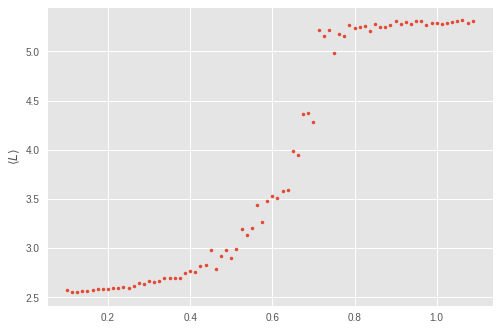

In [162]:
li = []
path = 'results/trans_01/'
for i in range(0,80):
    filename = path + str(i)+'.csv'
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d = pd.concat(li, axis=0, ignore_index=True)
_= plt.plot(d['T'], d['L'], marker='.', linestyle='none');
_= plt.ylabel(r'$\langle L \rangle$');
#plt.xscale('log')
plt.show()


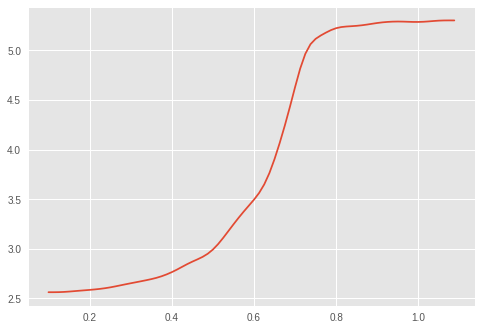

In [163]:
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(d['L'], sigma=2)
plt.plot(d['T'], ysmoothed)

plt.show()

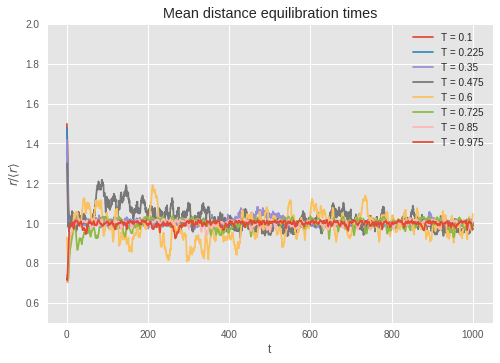

In [164]:
def plot(filename, T):
    eq = pd.read_csv(filename)
    Lp = eq['L'].iloc[100000:].mean()
    eq['L'] = eq['L']/Lp
    plt.plot(eq['t'], eq['L'], label="T = {}".format(T));
    


for i in range(8):
    filename = 'results/eq_t01/{}.csv'.format(i)
    T = 0.1 + i/8 
    plot(filename, T)

plt.style.use('ggplot')
_ = plt.ylabel(r'$r / \langle r \rangle$')
_ = plt.xlabel("t")
_ = plt.legend()
_ = plt.ylim(0.5,2)
_ = plt.title("Mean distance equilibration times")
plt.savefig("equilibrium.png")


In [172]:
def dataTL(path, n):
    li = []
    for i in range(n):
        filename = path + str(i)+'.csv'
        df = pd.read_csv(filename, index_col=None, header=0)
        li.append(df)

    T = [0.1 + i * 1.1/n for i in range(n)]
    lmean = [np.mean(d['L'].iloc[100000:]) for d in li]

    return pd.DataFrame(list(zip(T,lmean)), columns=['T', 'L'])



In [185]:
li = []
path = 'results/t_01_n128/'
for i in range(0,80):
    filename = path + str(i)+'.csv'
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = dataTL('results/lengths_n32/', 160)
dg = dataTL('', 160)
dh = pd.concat(li, axis=0, ignore_index=True)
print(df.head(), dg.head(),dh.head(), sep='\n')

T         L
0  0.100000  2.048026
1  0.106875  2.056433
2  0.113750  2.105471
3  0.120625  2.064794
4  0.127500  2.056995
          T         L
0  0.100000  2.570652
1  0.106875  2.556321
2  0.113750  2.568818
3  0.120625  2.553586
4  0.127500  2.561061
         T        L
0  0.10000  3.12472
1  0.11375  3.11754
2  0.12750  3.15182
3  0.14125  3.12335
4  0.15500  3.28641


In [200]:
df['rho'] = 1/ df['L']**3
dg['rho'] = 1/ dg['L']**3
dh['rho'] = 1/ dh['L']**3

df_i = df['L'].iloc[0]
dg_i = dg['L'].iloc[0]
dh_i = dh['L'].iloc[0]

df['Ln'] = df['L'] / df_i
dg['Ln'] = dg['L'] / dg_i
dh['Ln'] = dh['L'] / dh_i



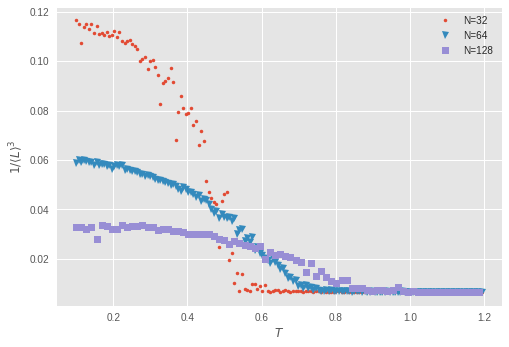

In [205]:
_ = plt.plot(df['T'], df['rho'], marker='.', linestyle='none', label='N=32')
_ = plt.plot(dg['T'], dg['rho'], marker='v', linestyle='none', label='N=64')
_ = plt.plot(dh['T'], dh['rho'], marker='s', linestyle='none', label='N=128')
_ = plt.legend()
_ = plt.ylabel(r'$1/\langle L \rangle^3$')
_ = plt.xlabel(r'$T$')
plt.savefig('MeanRhoEvolution.png')
#plt.show()

In [206]:
di = dataTL('', 160)

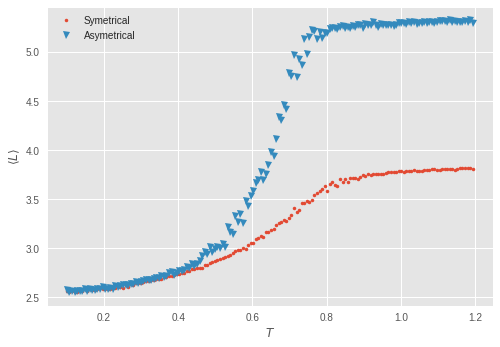

In [215]:
_ = plt.plot(di['T'], di['L'], marker='.', linestyle='none', label='Symetrical')
_ = plt.plot(dg['T'], dg['L'], marker='v', linestyle='none', label='Asymetrical')
_ = plt.legend()
_ = plt.ylabel(r'$\langle L \rangle$')
_ = plt.xlabel(r'$T$')
plt.savefig('Geometry.png')
#plt.show()

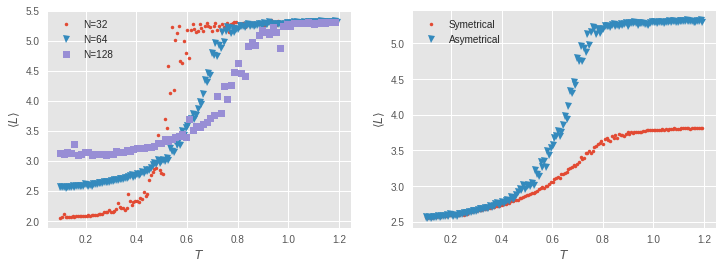

In [214]:
fig = plt.figure(1, figsize=[12, 4])

s1 = plt.subplot(121)
_ = s1.plot(df['T'], df['L'], marker='.', linestyle='none', label='N=32')
_ = s1.plot(dg['T'], dg['L'], marker='v', linestyle='none', label='N=64')
_ = s1.plot(dh['T'], dh['L'], marker='s', linestyle='none', label='N=128')
_ = s1.legend()
_ = s1.set_ylabel(r'$\langle L \rangle$')
_ = s1.set_xlabel(r'$T$')

s2 = plt.subplot(122)
_ = s2.plot(di['T'], di['L'], marker='.', linestyle='none', label='Symetrical')
_ = s2.plot(dg['T'], dg['L'], marker='v', linestyle='none', label='Asymetrical')
_ = s2.legend()
_ = s2.set_ylabel(r'$\langle L \rangle$')
_ = s2.set_xlabel(r'$T$')

plt.savefig("NumberAndBox.png")